# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    
> **Do not ZIP the files.**

Good Luck!

Adithya Harsha


**Honor Pledge:**  
I pledge on my honor that I, **Student Name**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [4]:
import sklearn
sklearn.__version__

'1.0.2'

In [4]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [6]:
# Your package imports here

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [7]:
loans = pd.read_csv('loans (1).csv')

**Check out the info(), head(), and describe() methods on loans.**

In [8]:
type(loans)

pandas.core.frame.DataFrame

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


In [10]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0
2,1,credit_card,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0
3,1,debt_consolidation,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0
4,1,debt_consolidation,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0


 Describe Loans

In [11]:
loans['not.fully.paid'].unique()

array([0, 1], dtype=int64)

In [12]:
Proportion = loans['not.fully.paid'].value_counts()

Proportion


0    1548
1    1433
Name: not.fully.paid, dtype: int64

#
there are two unique values in the 'not.fully.paid' column: 0 and 1.
    
The value 0' appears 1548 times 'not.fully.paid' column. 
The value 1 appears 1433 times the 'not.fully.paid' column.


#
There are 2981 rows and 14 variables in the loans dataset.


# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

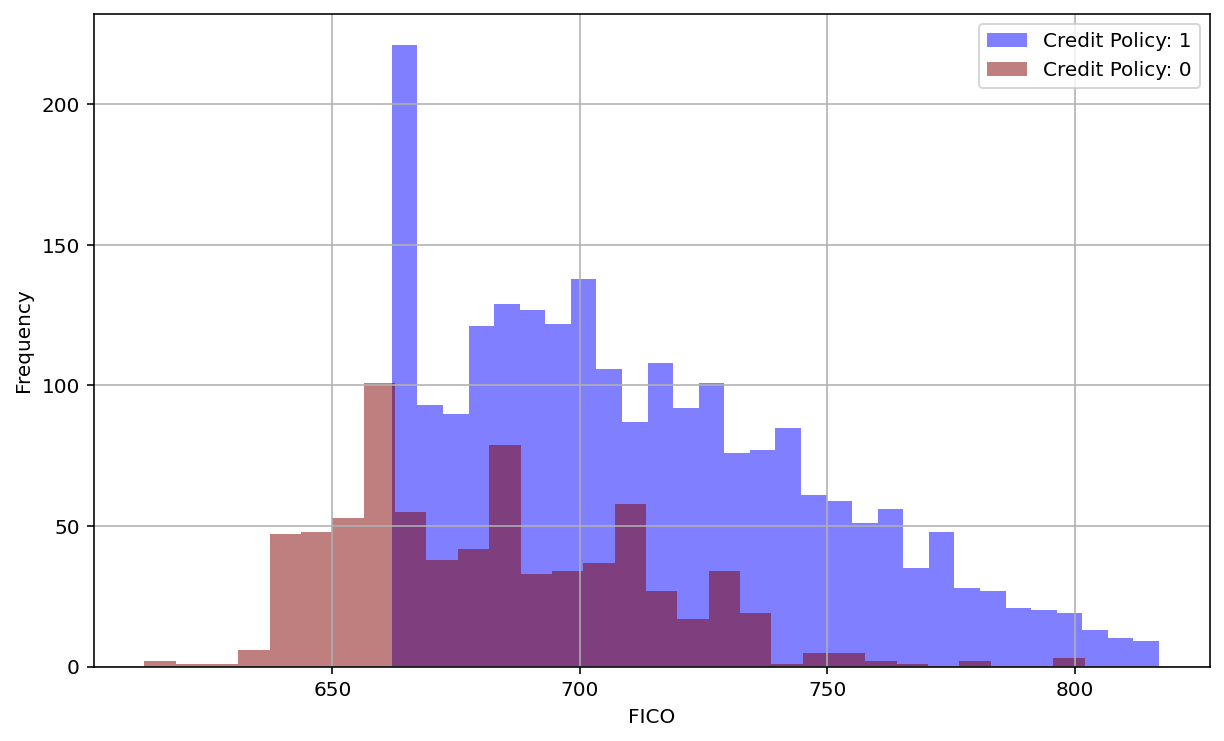

In [17]:
plt.figure(figsize=(10, 6))
loans[loans['credit.policy'] == 1]['fico'].hist(alpha=0.5, bins=30, label='Credit Policy: 1', color='blue')
loans[loans['credit.policy'] == 0]['fico'].hist(alpha=0.5, bins=30, label='Credit Policy: 0', color='maroon')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('FICO')
plt.show()




In [18]:
# Alternatively you can use seaborn library to create the same histogram (although due to bin creation, it might look different!)
import seaborn as sns

<AxesSubplot:xlabel='fico', ylabel='Count'>

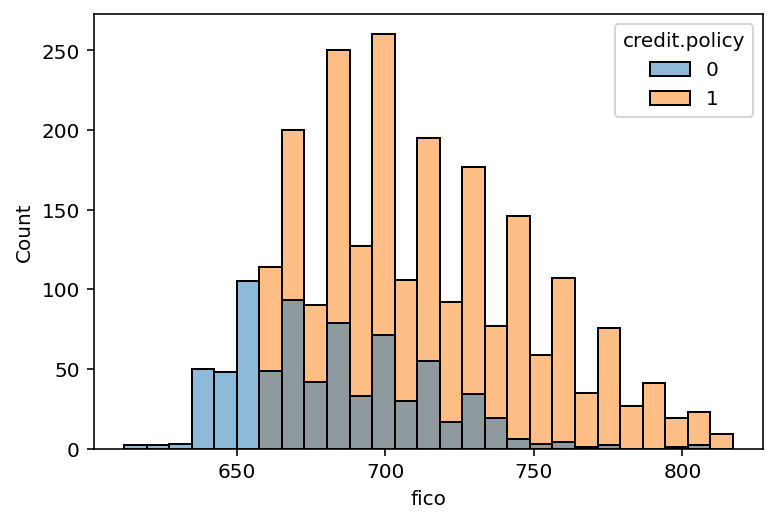

In [18]:
sns.histplot(x='fico', hue='credit.policy', data=loans)


**Create another histogram for `not.fully.paid` column.**

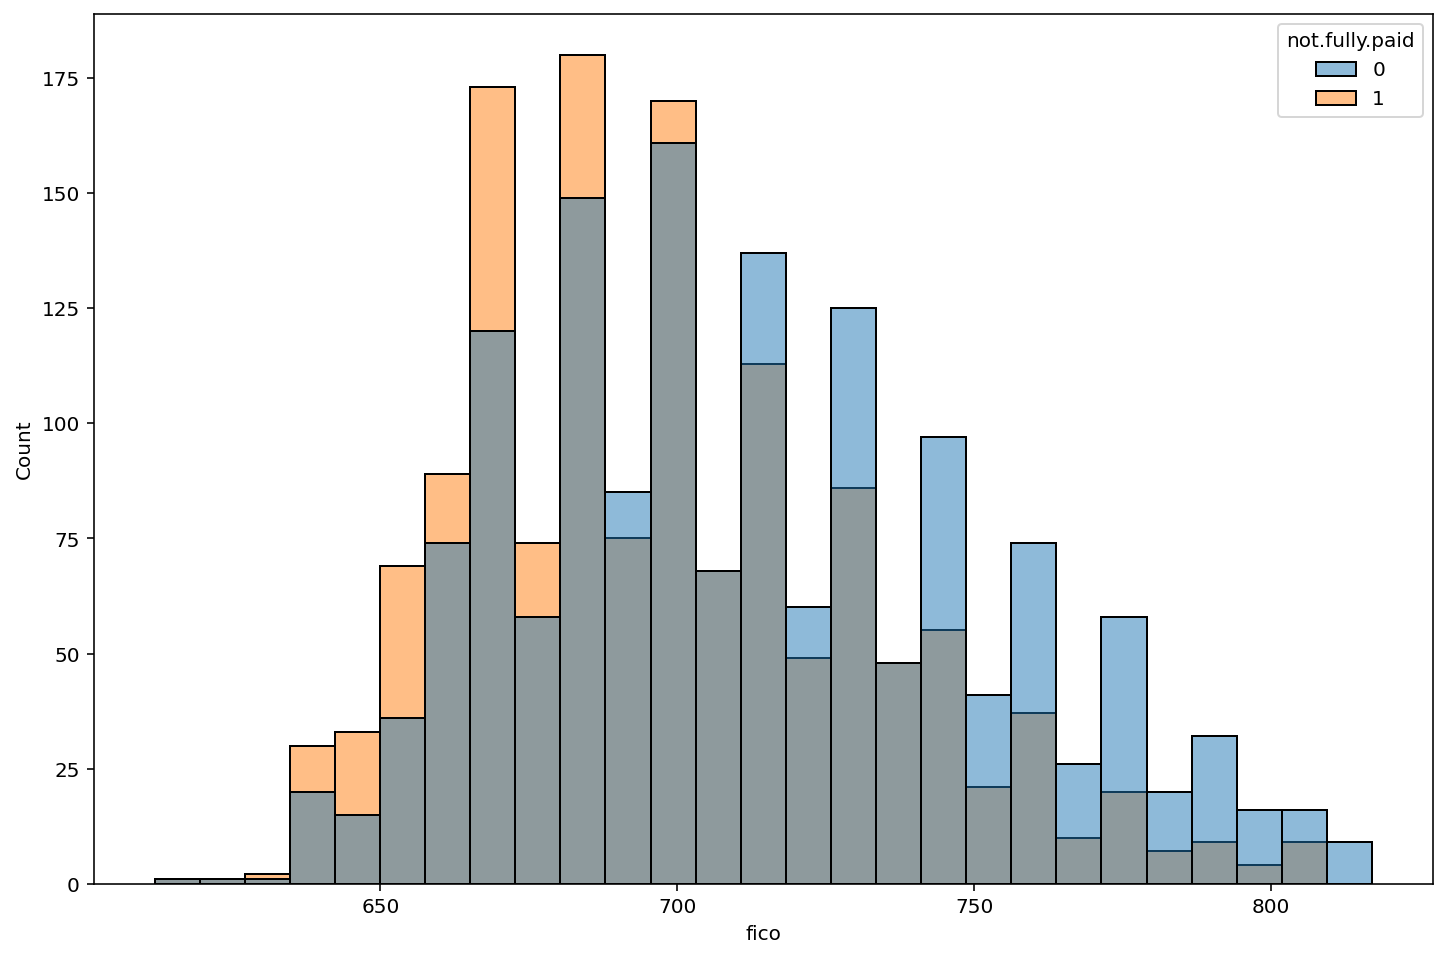

In [21]:
plt.figure(figsize=(12, 8))  # Set the figure size to 12x8 inches
sns.histplot(x='fico', hue='not.fully.paid', data=loans, alpha=0.5)
plt.show()

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

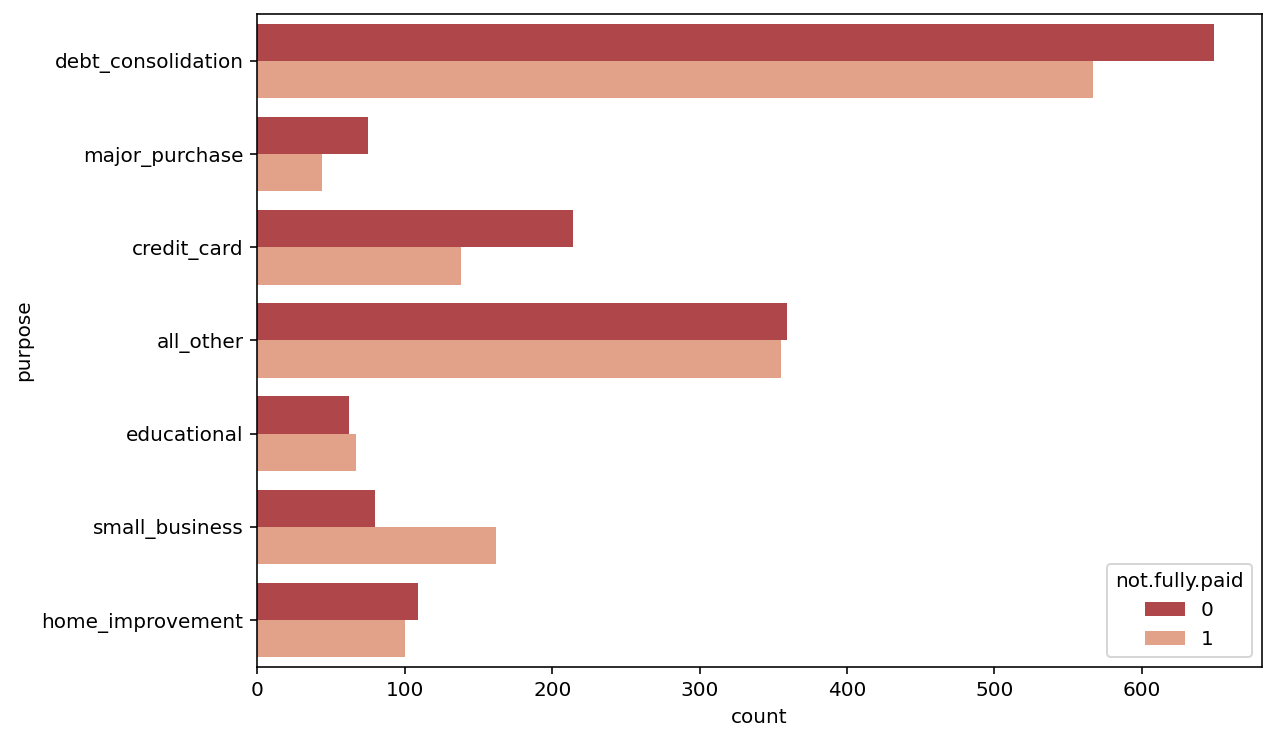

In [38]:
plt.figure(figsize=(9, 6))  # Set the figure size to 12x8 inches

# Create the countplot with custom colors
sns.set_palette("RdBu")
sns.countplot(y='purpose', hue='not.fully.paid', data=loans, orient="h")

plt.show()

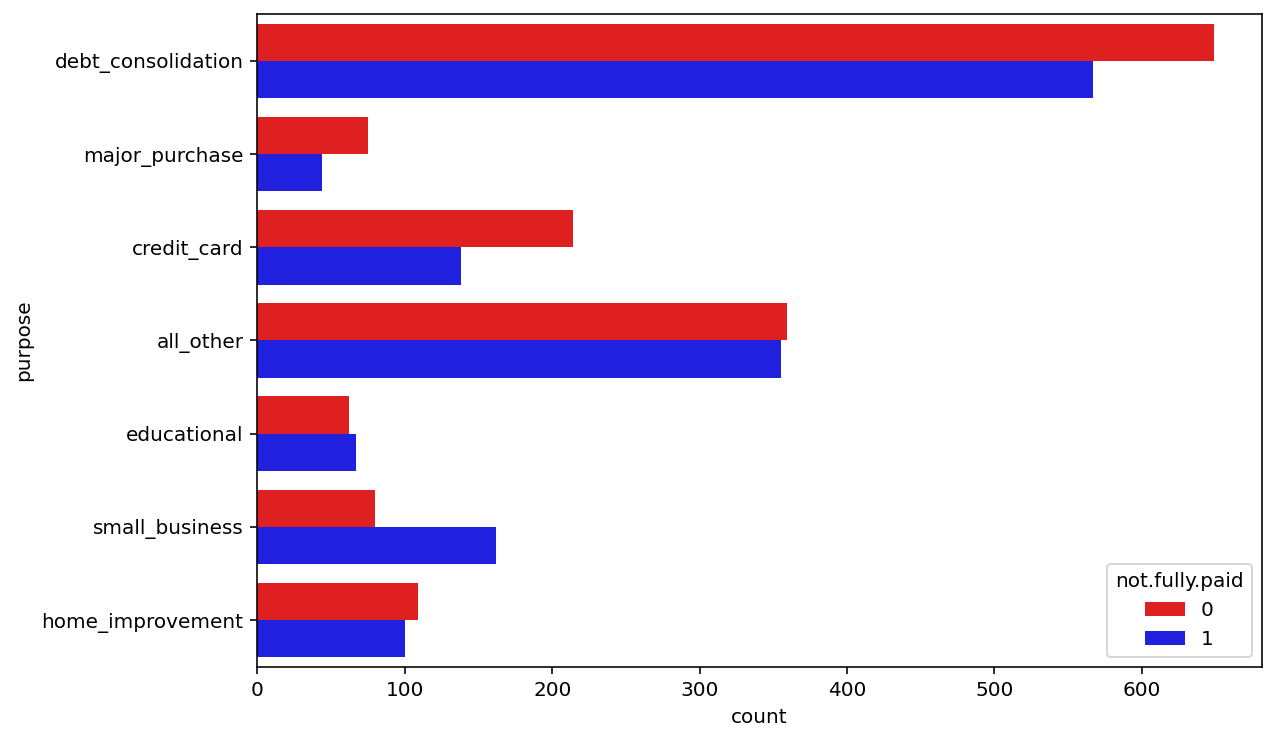

In [32]:

plt.figure(figsize=(9, 6))

# color palette with red for 0 and blue for 1
custom_palette = {0: "red", 1: "blue"}

sns.countplot(y='purpose', hue='not.fully.paid', data=loans, orient="h", palette=custom_palette)

plt.show()

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

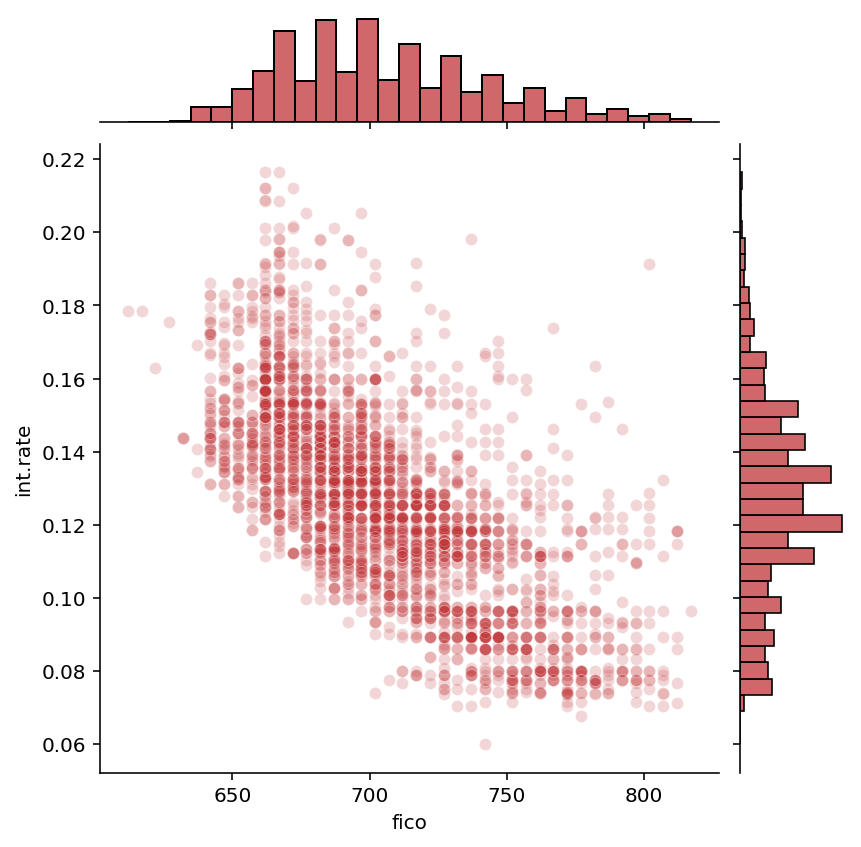

In [43]:
sns.jointplot(data=loans,x='fico',y='int.rate',alpha=0.2)

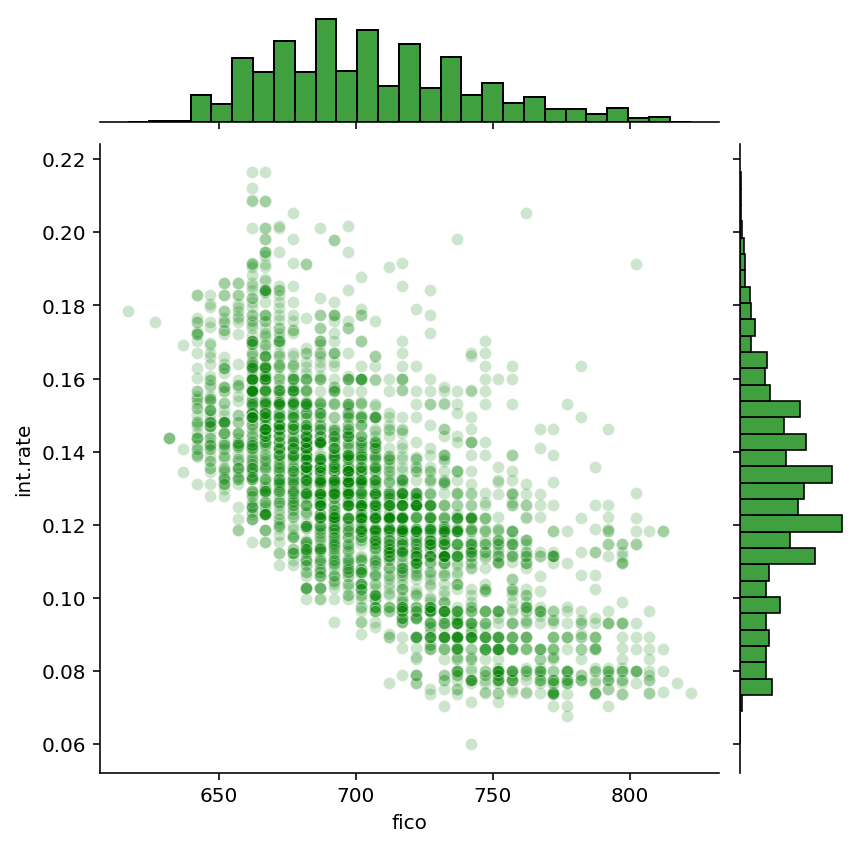

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `int.rate`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

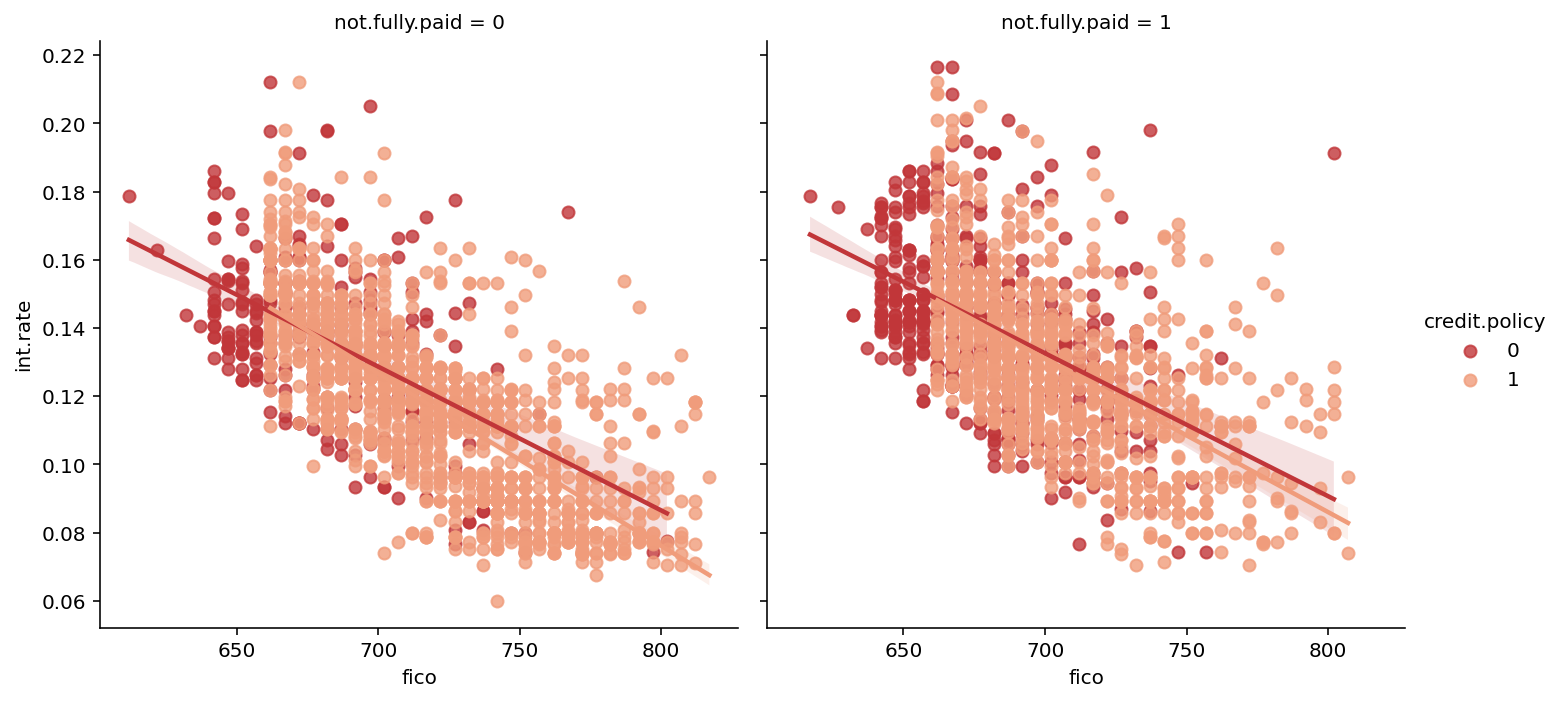

In [36]:
sns.lmplot(data=loans, x='fico', y='int.rate', col='not.fully.paid', hue='credit.policy')


# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**This question has already been solved. You don't need to do anything. Just run the cells and continue.**

In [45]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them.   

Let's do this in one step using pd.get_dummies().


> The same transformation needs to be aplied on the test set as well. The easiest way would be to merge train and test sets, and to split after the transformation.

In [46]:
cat_feats = ['purpose']

In [47]:
loans = pd.get_dummies(loans, columns=cat_feats, drop_first=False)

In [48]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2981 non-null   int64  
 1   int.rate                    2981 non-null   float64
 2   installment                 2981 non-null   float64
 3   log.annual.inc              2981 non-null   float64
 4   dti                         2981 non-null   float64
 5   fico                        2981 non-null   int64  
 6   days.with.cr.line           2981 non-null   float64
 7   revol.bal                   2981 non-null   int64  
 8   revol.util                  2981 non-null   float64
 9   inq.last.6mths              2981 non-null   int64  
 10  delinq.2yrs                 2981 non-null   int64  
 11  pub.rec                     2981 non-null   int64  
 12  not.fully.paid              2981 non-null   int64  
 13  purpose_all_other           2981 

In [49]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0,0.1797,364.99,10.762488,23.53,642,4252.041667,10226,63.9,1,1,0,0,0,0,1,0,0,0,0
2977,1,0.1316,202.63,11.156251,23.91,692,2130.000000,22713,43.1,1,0,0,0,0,0,1,0,0,0,0
2978,1,0.1148,263.75,10.491274,2.90,727,1800.000000,2980,31.7,1,0,0,0,0,0,1,0,0,0,0
2979,1,0.1442,859.57,12.611538,1.48,702,5279.958333,28367,66.5,2,1,0,0,0,0,0,0,1,0,0


In [54]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

<AxesSubplot:>

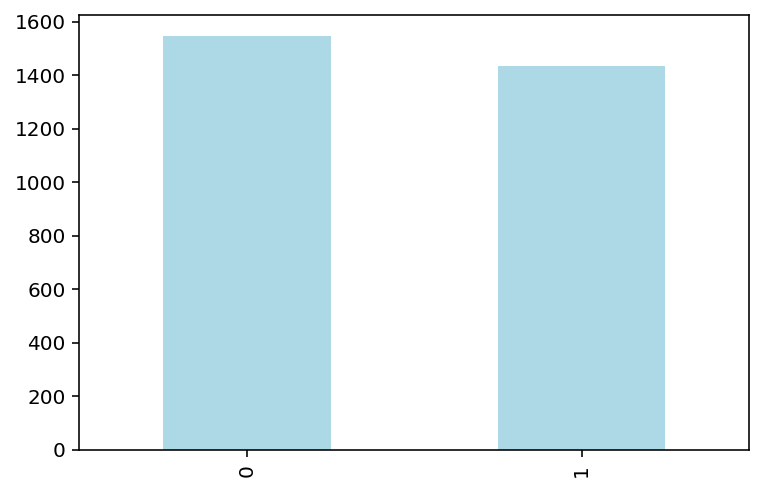

In [71]:

light_blue = '#ADD8E6'

# custom plotbar
y.value_counts().plot(kind='bar', color=light_blue)

<AxesSubplot:>

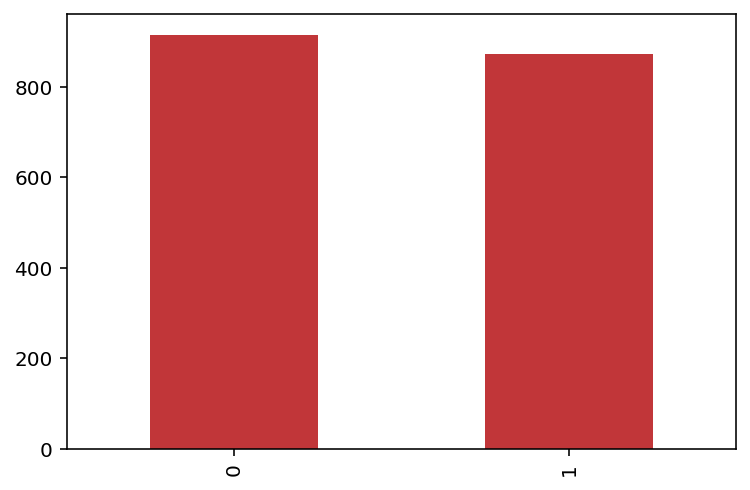

In [67]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

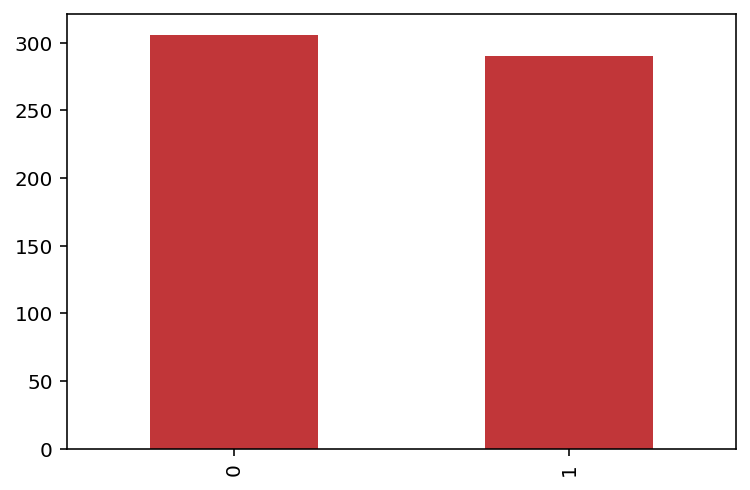

In [68]:
y_val.value_counts().plot(kind='bar')

> NOTE:

When asked to provide the performance metrics you can use the confusion matrix or the methods in `sklearn.metrics`.  
**Performance metrics** (at the very least):  
- Recall (Sensitivity)  
- Specificity  
- Precision  
- Balanced Accuracy  
- F1 Score  

Grid Search:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


# Q4

## Decision Tree Model

Let's start by training a single decision tree first!

1. Default decision tree:
    - Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.


2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Try several values for the `min_samples_split` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.  
        - Using the best model provide the performance metrics for the validation set.
    - Try several values for the `max_depth` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value. 
        - Using the best model provide the performance metrics for the validation set.
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split` and `max_depth`.
        - Using the best model provide the performance metrics for the validation set.
        
        
3. Create a chart showing the feature importances based on the best model obtained.

In [73]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score

# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier()

# Fit the model
dtc.fit(X_train, y_train)

# Make predictions
y_train_pred = dtc.predict(X_train)
y_val_pred = dtc.predict(X_val)

# Calculate and print accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

# Calculate and print confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)

# Calculate and print classification report
print("Classification Report:\n", classification_report(y_val, y_val_pred))


Training Accuracy: 1.0
Validation Accuracy: 0.5738255033557047
Confusion Matrix:
 [[169 137]
 [117 173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.55      0.57       306
           1       0.56      0.60      0.58       290

    accuracy                           0.57       596
   macro avg       0.57      0.57      0.57       596
weighted avg       0.57      0.57      0.57       596



In [94]:
# Calculate and print recall
recall = recall_score(y_val, y_val_pred)
print("Recall:", recall)

Recall: 0.596551724137931


In [95]:
#specificity
tnegative, falseposiv, falseneg, tpositive = confusion_matrix(y_true = y_val, y_pred = y_val_pred).ravel()
specificity = tnegative / (tnegative+falseposiv)
specificity

0.5522875816993464

In [96]:
#precisoni
metrics.precision_score(y_true = y_val, y_pred = y_val_pred)

0.5580645161290323

In [103]:
#balanced accuracy score
metrics.balanced_accuracy_score(y_true = y_val, y_pred = y_val_pred, sample_weight=None, adjusted=False)

0.5744196529186387

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score
# Calculate and print F1 score
f1 = f1_score(y_val, y_val_pred)
print("F1 Score:", f1)

F1 Score: 0.5766666666666667


#
* Trainin accuracy 1.0

* Testing accuracy 0.56

* Recall (Sensitivity) 0.59

* Specificity 0.55

* Precision 0.55

* Balanced Accuracy 0.57

* F1 Score 0.57


### Hyperparameter Tuning: min_samples_split

In [107]:
params = dict(
    #min_samples_split = [2,3,5, 10, 20, 30, 40, 50, 100,200,300],
    min_samples_split = [5, 10, 20, 30, 40, 50],


    max_depth = [2,3, 4, 8, 16, None],
)

grid_search5 = GridSearchCV(dtc, params, cv=5, scoring='f1')
grid_search5.fit(X_train, y_train)
print("Best parameters",grid_search5.best_params_)
# best hyperparameters
best_params = grid_search5.best_params_
#  best model
best_model5 = grid_search5.best_estimator_


val_predictions = best_model5.predict(X_val)

# accuracy of the model on the validation data
val_accuracy = accuracy_score(y_val, val_predictions)

# Confusion matrix
val_confusion_matrix = confusion_matrix(y_val, val_predictions)

print("Validation Accuracy with best min_samples_split:", val_accuracy)

print("Validation Confusion Matrix:", val_confusion_matrix)




Best parameters {'max_depth': 8, 'min_samples_split': 40}
Validation Accuracy with best min_samples_split: 0.5973154362416108
Validation Confusion Matrix: [[188 118]
 [122 168]]


In [108]:
from sklearn.metrics import classification_report

# Assuming you've made predictions on the validation set and stored them in val_predictions
val_predictions = dtc.predict(X_val)

# Print the classification report for the validation set
print("Classification Report:\n", classification_report(y_val, val_predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63       306
           1       0.60      0.52      0.56       290

    accuracy                           0.60       596
   macro avg       0.60      0.60      0.59       596
weighted avg       0.60      0.60      0.60       596



In [110]:
from sklearn.metrics import recall_score

# Assuming you've made predictions on the validation set and stored them in val_predictions
recall = recall_score(y_val, val_predictions)

# Print the recall
print("Recall:", recall)


Recall: 0.5241379310344828


In [111]:
from sklearn.metrics import confusion_matrix

# Assuming you've made predictions on the validation set and stored them in val_predictions
conf_matrix = confusion_matrix(y_val, val_predictions)

tnegative, falsepositive, falsenegative, tpositive = conf_matrix.ravel()
specificity = tnegative / (tnegative + falsepositive)

print("Specificity (True Negative Rate):", specificity)


Specificity (True Negative Rate): 0.6666666666666666


In [112]:
#precision
metrics.precision_score(y_true = y_val, y_pred = val_predictions)

0.5984251968503937

In [114]:
from sklearn.metrics import balanced_accuracy_score

# Assuming you've made predictions on the validation set and stored them in val_predictions
balanced_acc = balanced_accuracy_score(y_val, val_predictions)

print("Balanced Accuracy Score:", balanced_acc)


Balanced Accuracy Score: 0.5954022988505747


In [116]:
from sklearn.metrics import f1_score

# Assuming you've made predictions on the validation set and stored them in val_predictions
f1 = f1_score(y_val, val_predictions)

print("F1 Score:", f1)


F1 Score: 0.5588235294117648


In [117]:
importances1 = grid_search5.best_estimator_.feature_importances_



In [118]:
feature_importances1 = pd.DataFrame({'Feature': X.columns, 'Importance': importances1})



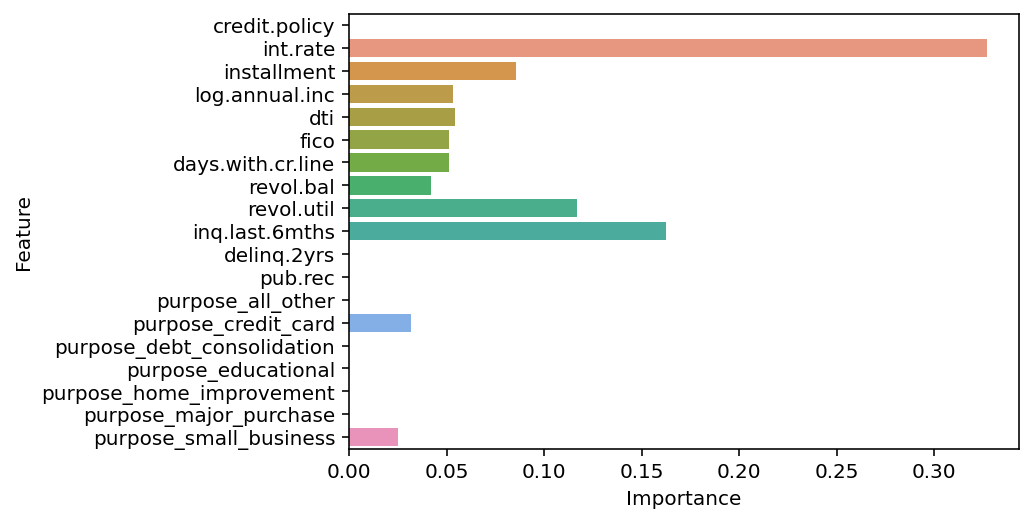

In [119]:
sns.barplot(x=feature_importances1['Importance'], y=feature_importances1['Feature'])
plt.show()

In [120]:
#best_model5 = grid_search5.best_estimator_


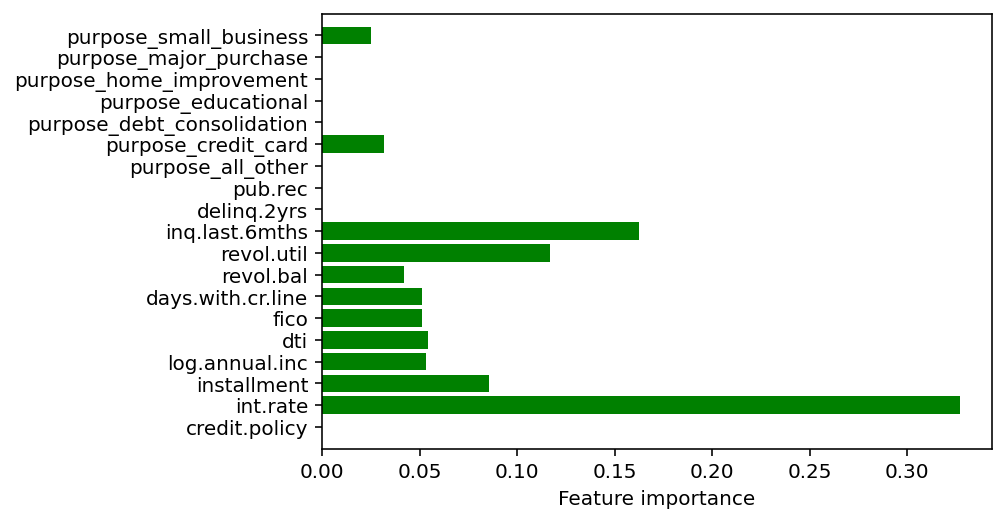

In [126]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center',color='green')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylim(-1, n_features)

plot_feature_importances(grid_search5.best_estimator_, df=X)

# Q5

## Random Forest model

1. Default Random Forest Classifier:
    - Initiate the Random Forest Classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split`, `max_depth`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rfc = RandomForestClassifier()

In [130]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [131]:
y_pred5 = rfc.predict(X_val)

In [132]:
train_acc = accuracy_score(y_train, rfc.predict(X_train))
val_acc = accuracy_score(y_val, y_pred5)
print("Training Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)


Training Accuracy:  1.0
Validation Accuracy:  0.5855704697986577


In [133]:
cm = confusion_matrix(y_val, y_pred5)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[185 121]
 [126 164]]


In [134]:
print("Classification Report: \n", classification_report(y_val, y_pred5))


Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.60      0.60       306
           1       0.58      0.57      0.57       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596



In [137]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, balanced_accuracy_score, f1_score

# Assuming you've made predictions on the validation set and stored them in y_pred5
recall = recall_score(y_val, y_pred5)
conf_matrix = confusion_matrix(y_val, y_pred5)
tnegative, falsepositive, falsenegative, tpositive = conf_matrix.ravel()
specificity = tnegative / (tnegative + falsepositive)
precision = precision_score(y_val, y_pred5)
balanced_acc = balanced_accuracy_score(y_val, y_pred5)
f1 = f1_score(y_val, y_pred5)

print("Recall:", recall)
print("Specificity (True Negative Rate):", specificity)
print("Precision:", precision)
print("Balanced Accuracy Score:", balanced_acc)
print("F1 Score:", f1)


Recall: 0.5655172413793104
Specificity (True Negative Rate): 0.6045751633986928
Precision: 0.5754385964912281
Balanced Accuracy Score: 0.5850462023890015
F1 Score: 0.5704347826086956


####   HYper parameter tuning

In [138]:
param_grid = {
    'min_samples_split': [2, 4, 6],
    'max_depth': [None, 5, 10, 15],
    'n_estimators': [50, 100, 200]
}


In [139]:
grid_search1 = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='f1', cv=5)


In [140]:
grid_search1.fit(X_train, y_train)
print("Best Parameters: ", grid_search1.best_params_)

Best Parameters:  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [141]:
best_clf = grid_search1.best_estimator_

In [142]:
y_pred5_1 = best_clf.predict(X_val)


In [143]:
print("Classification Report (Best Model): \n", classification_report(y_val, y_pred5_1))


Classification Report (Best Model): 
               precision    recall  f1-score   support

           0       0.62      0.67      0.64       306
           1       0.62      0.56      0.59       290

    accuracy                           0.62       596
   macro avg       0.62      0.61      0.61       596
weighted avg       0.62      0.62      0.61       596



In [144]:
print("Confusion matrix (Best Model): \n",confusion_matrix(y_val, y_pred5_1))


Confusion matrix (Best Model): 
 [[205 101]
 [128 162]]


In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, balanced_accuracy_score, f1_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'min_samples_split': [2, 4, 6],
    'max_depth': [None, 5, 10, 15],
    'n_estimators': [50, 100, 200]
}

# Create a Random Forest Classifier instance
rfc = RandomForestClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='f1', cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create the best model with the best parameters
best_clf = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_clf.predict(X_val)



In [153]:
# Print the classification report
print("Classification Report (Best Model):")
print(classification_report(y_val, y_pred))

# Print the confusion matrix
print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_val, y_pred))

# Calculate and print recall
recall = recall_score(y_val, y_pred)
print("Recall:", recall)

# Calculate and print specificity
tnegative, falsepositive, falsenegative, tpositive = confusion_matrix(y_val, y_pred).ravel()
specificity = tnegative / (tnegative + falsepositive)
print("Specificity:", specificity)

# Calculate and print precision
precision = precision_score(y_val, y_pred)
print("Precision:", precision)

# Calculate and print balanced accuracy score
balanced_acc = balanced_accuracy_score(y_val, y_pred)
print("Balanced Accuracy Score:", balanced_acc)

# Calculate and print F1 score
f1 = f1_score(y_val, y_pred)
print("F1 Score:", f1)


Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       306
           1       0.60      0.60      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596

Confusion Matrix (Best Model):
[[190 116]
 [116 174]]
Recall: 0.6
Specificity: 0.6209150326797386
Precision: 0.6
Balanced Accuracy Score: 0.6104575163398693
F1 Score: 0.6


In [154]:
importances = grid_search1.best_estimator_.feature_importances_


In [155]:
eature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})


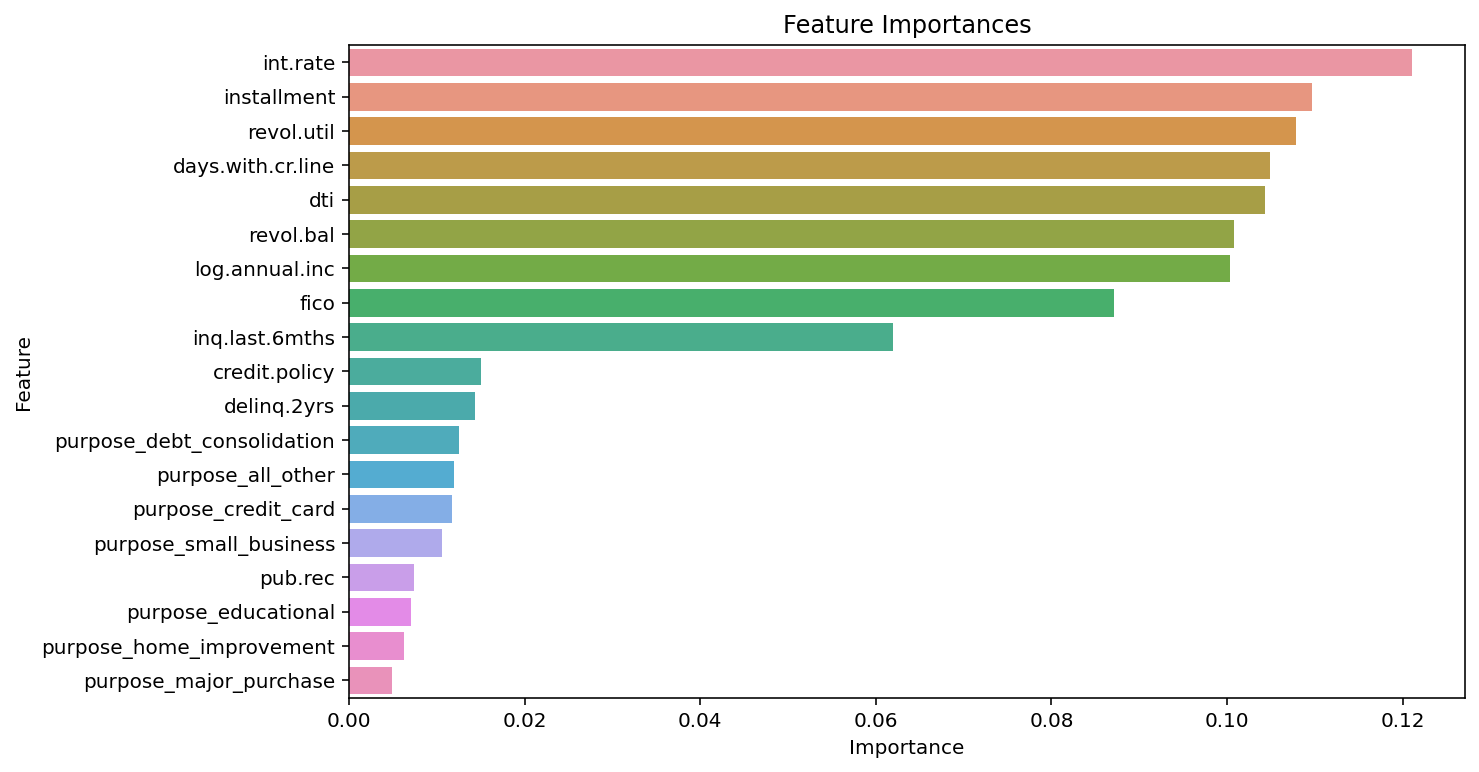

In [157]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Fit a RandomForestClassifier or another model to your data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Extract feature importances
feature_importances = rfc.feature_importances_

# Get the names of the features (e.g., column names)
feature_names = X_train.columns  # Replace with your actual feature names

# Create a DataFrame to store feature importances and their names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


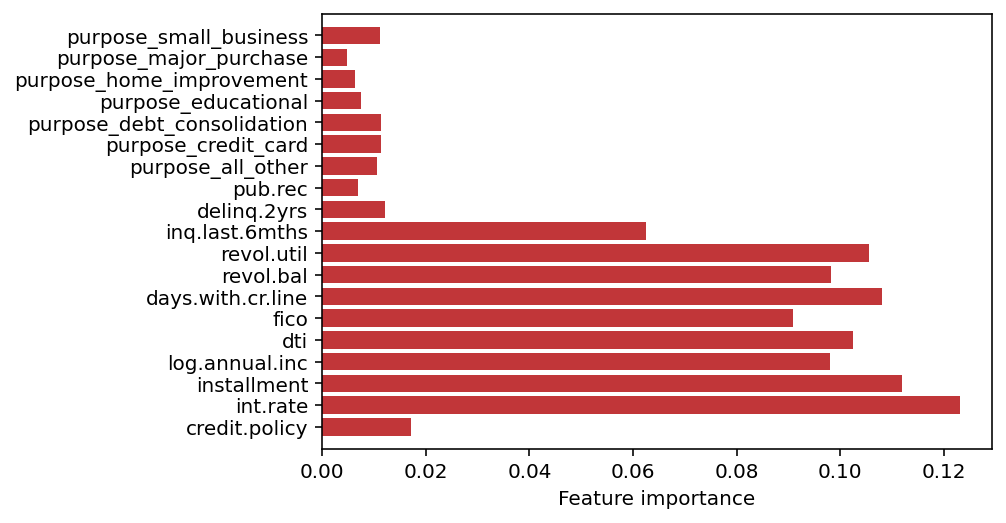

In [158]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylim(-1, n_features)

plot_feature_importances(best_clf, df=X)

# Q6

## Adaboost model

1. Default Adaboost classifier:
    - Initiate the Adaboost classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [159]:
from sklearn.ensemble import AdaBoostClassifier

In [160]:
adb = AdaBoostClassifier()

adb.fit(X_train, y_train)

y_pred6 = adb.predict(X_val)

# Calculate accuracy score
training_accuracy = accuracy_score(y_train, adb.predict(X_train))
validation_accuracy = accuracy_score(y_val, y_pred6)
print("Training Accuracy: ",training_accuracy)
print("Validation Accuracy: ",validation_accuracy)
conf_matrix = confusion_matrix(y_val, y_pred6)

print("Confusion Matrix: \n",conf_matrix)

print("Classifiction report: \n",classification_report(y_val, y_pred6))


Training Accuracy:  0.6739373601789709
Validation Accuracy:  0.5855704697986577
Confusion Matrix: 
 [[177 129]
 [118 172]]
Classifiction report: 
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       306
           1       0.57      0.59      0.58       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596



In [164]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, balanced_accuracy_score, f1_score

# Create an AdaBoostClassifier instance
adb = AdaBoostClassifier()

# Fit the AdaBoost classifier to the training data
adb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred6 = adb.predict(X_val)




In [166]:
# Calculate accuracy score for training and validation
training_accuracy = accuracy_score(y_train, adb.predict(X_train))
validation_accuracy = accuracy_score(y_val, y_pred6)
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred6)
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
print("Classification Report:\n", classification_report(y_val, y_pred6))



Training Accuracy: 0.6739373601789709
Validation Accuracy: 0.5855704697986577
Confusion Matrix:
 [[177 129]
 [118 172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       306
           1       0.57      0.59      0.58       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596



In [167]:
# Calculate and print recall
recall = recall_score(y_val, y_pred6)
print("Recall:", recall)

# Calculate and print specificity
tnegative, falsepositive, falsenegative, tpositive = confusion_matrix(y_val, y_pred6).ravel()
specificity = tnegative / (tnegative + falsepositive)
print("Specificity:", specificity)

# Calculate and print precision
precision = precision_score(y_val, y_pred6)
print("Precision:", precision)

# Calculate and print balanced accuracy score
balanced_acc = balanced_accuracy_score(y_val, y_pred6)
print("Balanced Accuracy Score:", balanced_acc)

# Calculate and print F1 score
f1 = f1_score(y_val, y_pred6)
print("F1 Score:", f1)

Recall: 0.593103448275862
Specificity: 0.5784313725490197
Precision: 0.5714285714285714
Balanced Accuracy Score: 0.5857674104124408
F1 Score: 0.5820642978003383


###  HYPER PARAMETER TUNING



In [187]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'n_estimators': [100, 250, 500, 750, 1000]}
grid_search7 = GridSearchCV(gbc, param_grid, scoring='f1')
grid_search7.fit(X_train, y_train)

best_params = grid_search7.best_params_
best_clf = GradientBoostingClassifier(learning_rate=best_params['learning_rate'],
                                      n_estimators=best_params['n_estimators'])
best_clf.fit(X_train, y_train)

y_pred71 = best_clf.predict(X_val)
print("Validation set performance metrics using the best model:")
print(classification_report(y_val, y_pred71))

Validation set performance metrics using the best model:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       306
           1       0.60      0.59      0.59       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



In [171]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, balanced_accuracy_score, f1_score

# Create an AdaBoostClassifier instance
adb = AdaBoostClassifier()

# Fit the AdaBoost classifier to the training data
adb.fit(X_train, y_train)

# Define the hyperparameter grid for tuning
param_grid = {
    "learning_rate": [0.1, 0.5, 1.0],
    "n_estimators": [50, 100, 200, 500],
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(adb, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the hyperparameter tuning
best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred61 = best_model.predict(X_val)



Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [172]:
# Provide the performance metrics for the validation set
print("Validation Performance Metrics (Best Model):\n", classification_report(y_val, y_pred61))

# Calculate and print validation accuracy
validation_accuracy = accuracy_score(y_val, y_pred61)
print("Validation Accuracy:", validation_accuracy)




Validation Performance Metrics (Best Model):
               precision    recall  f1-score   support

           0       0.61      0.62      0.61       306
           1       0.59      0.58      0.59       290

    accuracy                           0.60       596
   macro avg       0.60      0.60      0.60       596
weighted avg       0.60      0.60      0.60       596

Validation Accuracy: 0.6006711409395973


In [173]:
# Calculate and print recall
recall = recall_score(y_val, y_pred61)
print("Recall:", recall)

# Calculate and print specificity
tnegative, falsepositive, falsenegative, tpositive = confusion_matrix(y_val, y_pred61).ravel()
specificity = tnegative / (tnegative + falsepositive)
print("Specificity:", specificity)

# Calculate and print precision
precision = precision_score(y_val, y_pred61)
print("Precision:", precision)

# Calculate and print balanced accuracy score
balanced_acc = balanced_accuracy_score(y_val, y_pred61)
print("Balanced Accuracy Score:", balanced_acc)

# Calculate and print F1 score
f1 = f1_score(y_val, y_pred61)
print("F1 Score:", f1)

Recall: 0.5793103448275863
Specificity: 0.6209150326797386
Precision: 0.5915492957746479
Balanced Accuracy Score: 0.6001126887536624
F1 Score: 0.5853658536585367


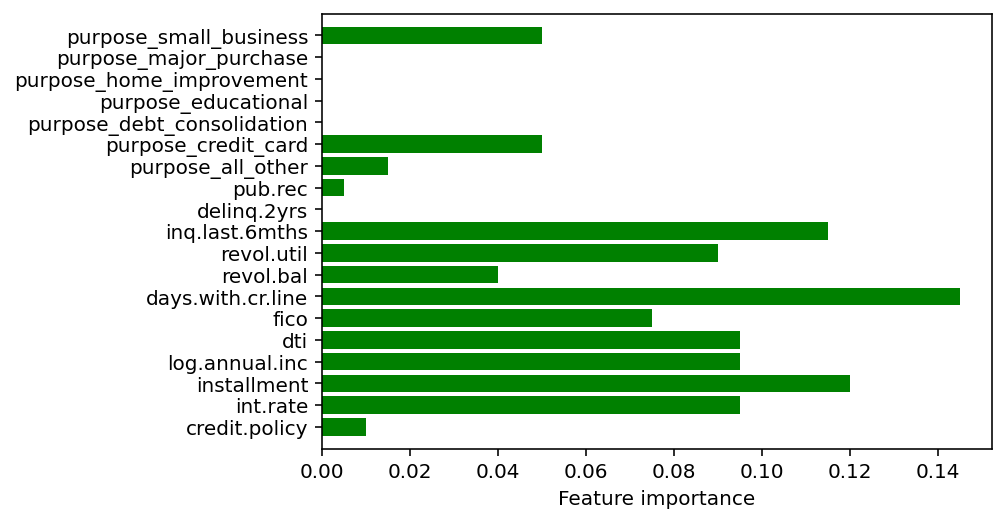

In [175]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center',color='green' )
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylim(-1, n_features)

plot_feature_importances(best_model2, df=X)

# Q7

## Gradient Boosting Machine

1. Default Gradient Boosting classifier:
    - Initiate the Gradient Boosting classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
        
3. Create a chart showing the feature importances based on the best model obtained.

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, balanced_accuracy_score, f1_score

# Create a GradientBoostingClassifier instance
gbc = GradientBoostingClassifier()

# Fit the model to the training data
gbc.fit(X_train, y_train)

# Make predictions on the validation set
y_pred7 = gbc.predict(X_val)




In [185]:
# Calculate and print training and validation accuracy
train_accuracy = accuracy_score(y_train, gbc.predict(X_train))
val_accuracy = accuracy_score(y_val, y_pred7)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Training Accuracy: 0.7986577181208053
Validation Accuracy: 0.610738255033557


In [186]:
# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred7)
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
print("Validation Set Performance Metrics:\n", classification_report(y_val, y_pred7))


Confusion Matrix:
 [[193 113]
 [119 171]]
Validation Set Performance Metrics:
               precision    recall  f1-score   support

           0       0.62      0.63      0.62       306
           1       0.60      0.59      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



In [181]:
# Calculate and print recall
recall = recall_score(y_val, y_pred7)
print("Recall:", recall)

# Calculate and print specificity
tnegative, falsepositive, falsenegative, tpositive = confusion_matrix(y_val, y_pred7).ravel()
specificity = tnegative / (tnegative + falsepositive)
print("Specificity:", specificity)

# Calculate and print precision
precision = precision_score(y_val, y_pred7)
print("Precision:", precision)

# Calculate and print balanced accuracy score
balanced_acc = balanced_accuracy_score(y_val, y_pred7)
print("Balanced Accuracy Score:", balanced_acc)

# Calculate and print F1 score
f1 = f1_score(y_val, y_pred7)
print("F1 Score:", f1)

Recall: 0.5896551724137931
Specificity: 0.630718954248366
Precision: 0.602112676056338
Balanced Accuracy Score: 0.6101870633310795
F1 Score: 0.5958188153310104


### HYPER PARAMETER TUNING



In [188]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, balanced_accuracy_score, f1_score

# Create a GradientBoostingClassifier instance
gbc = GradientBoostingClassifier()

# Fit the model to the training data
gbc.fit(X_train, y_train)

# Make predictions on the validation set
y_pred7 = gbc.predict(X_val)

# Calculate accuracy score
train_accuracy = accuracy_score(y_train, gbc.predict(X_train))
validation_accuracy = accuracy_score(y_val, y_pred7)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", validation_accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred7)
print("Confusion Matrix:\n", conf_matrix)



Training Accuracy: 0.7986577181208053
Validation Accuracy: 0.610738255033557
Confusion Matrix:
 [[193 113]
 [119 171]]


In [190]:
# Print the classification report
print("Classification Report:\n", classification_report(y_val, y_pred7))



Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.63      0.62       306
           1       0.60      0.59      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



In [191]:
# Recall
recall = recall_score(y_val, y_pred7)
print("Recall:", recall)

# Specificity
tnegative, falseposiv, falseneg, tpositive = confusion_matrix(y_val, y_pred7).ravel()
specificity = tnegative / (tnegative + falseposiv)
print("Specificity:", specificity)

# Precision
precision = precision_score(y_val, y_pred7)
print("Precision:", precision)

# Balanced Accuracy Score
balanced_acc = balanced_accuracy_score(y_val, y_pred7)
print("Balanced Accuracy Score:", balanced_acc)

# F1 Score
f1 = f1_score(y_val, y_pred7)
print("F1 Score:", f1)


Recall: 0.5896551724137931
Specificity: 0.630718954248366
Precision: 0.602112676056338
Balanced Accuracy Score: 0.6101870633310795
F1 Score: 0.5958188153310104


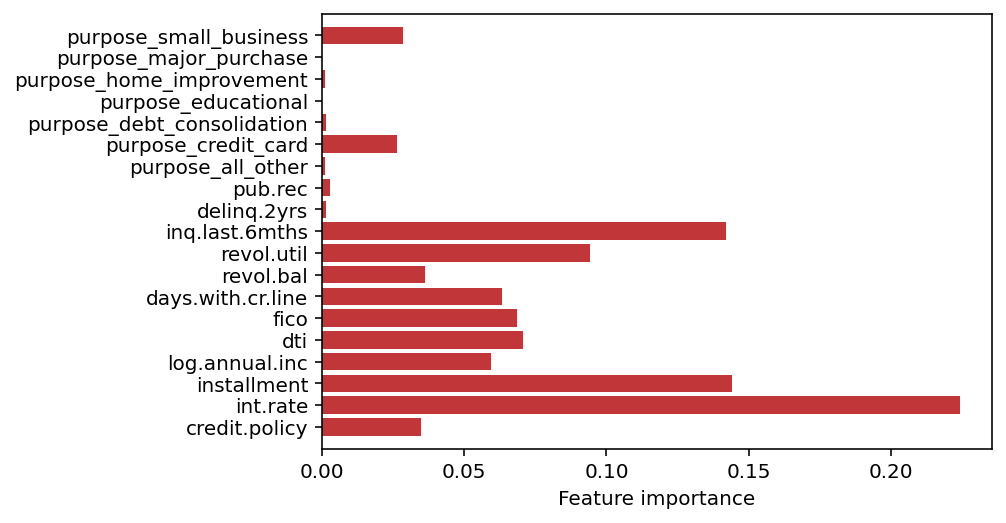

In [192]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylim(-1, n_features)

plot_feature_importances(best_clf, df=X)

# Q8 (15 points)

- Using one or more of the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the recall and F1-score and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model F1-score increasing?

In [193]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [194]:
dtree = DecisionTreeClassifier(
    max_depth=None,
    criterion='gini',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    random_state=0,
    class_weight=None,
    ccp_alpha=0.0)

bag = BaggingClassifier(base_estimator=dtree,                     
                        n_estimators=100, 
                        random_state=0, 
                        bootstrap=True, bootstrap_features=False, max_features=0.5, max_samples=0.5)
scores = cross_val_score(bag, X_train, y_train, cv=5)
scores.mean()

0.5878096489992645

###  Hyperparamter tuning with bagging classifier

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# Create a Decision Tree base estimator
dt = DecisionTreeClassifier()

# Create a BaggingClassifier with the Decision Tree base estimator
bagging = BaggingClassifier(base_estimator=dt)

# Define the hyperparameter grid for tuning
param_grid = {
    "base_estimator__max_depth": [3, 5, 7, None],
    "base_estimator__min_samples_split": [2, 4, 6, 8],
    "n_estimators": [10, 20, 30, 40, 50]
}

# Create a custom scorer for F1 score
scorer = make_scorer(f1_score, greater_is_better=True, average="micro")

# Perform hyperparameter tuning using GridSearchCV
grid = GridSearchCV(bagging, param_grid, scoring=scorer, cv=3)
grid.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid.best_params_

# Create the best BaggingClassifier model using the best hyperparameters
best_bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=best_params["base_estimator__max_depth"], 
                                          min_samples_split=best_params["base_estimator__min_samples_split"]), 
    n_estimators=best_params["n_estimators"])

# Fit the best model to the training data
best_bagging.fit(X_train, y_train)

# Make predictions on the validation set
y_pred8 = best_bagging.predict(X_val)



In [196]:
# Calculate F1-score on the validation set
f1_val = f1_score(y_val, y_pred8, average="micro")
print("F1-score on validation set:", f1_val)

# Recall
recall = recall_score(y_val, y_pred8)
print("Recall:", recall)

# Specificity
tnegative, falseposiv, falseneg, tpositive = confusion_matrix(y_val, y_pred8).ravel()
specificity = tnegative / (tnegative + falseposiv)
print("Specificity:", specificity)

# Precision
precision = precision_score(y_val, y_pred8)
print("Precision:", precision)

# Balanced Accuracy Score
balanced_acc = balanced_accuracy_score(y_val, y_pred8)
print("Balanced Accuracy Score:", balanced_acc)


F1-score on validation set: 0.62248322147651
Recall: 0.5
Specificity: 0.738562091503268
Precision: 0.6444444444444445
Balanced Accuracy Score: 0.619281045751634


##
The recall of each new model decreased from the previous model of decision tree and F1- is almost same

In [197]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initiate the Decision Tree Classifier
dt1 = DecisionTreeClassifier()
X1 = loans.drop('not.fully.paid',axis=1)
y1 = loans['not.fully.paid']
# Store the F1 scores for each fold
f1_scores = []
for train_index, test_index in kfold.split(X1, y1):
    X_train1, X_test1 = X1.loc[train_index], X1.loc[test_index]
    y_train1, y_test1 = y1.loc[train_index], y1.loc[test_index]
    
    # Fit the model on the training data
    dt.fit(X_train1, y_train1)
    
    # Make predictions on the test data
    y_pred1 = dt.predict(X_test1)
    
    # Calculate the F1 score
    f1 = f1_score(y_test1, y_pred1)
    
    # Store the score
    f1_scores.append(f1)

# Calculate the average F1 score
mean_f1 = np.mean(f1_scores)

print("Mean F1 score:", mean_f1)

Mean F1 score: 0.5450704633598928


###   
Stratified K-Fold cross-validation helps maintain a balanced class distribution in each fold, which can lead to more reliable model performance estimates. However, if your dataset is already well-balanced, you may not see significant score differences compared to regular K-Fold cross-validation.

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_val_standardized = scaler.transform(X_val)

# Create a GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    "learning_rate": [0.1, 0.05, 0.02, 0.01],
    "n_estimators": [100, 250, 500, 750, 1000]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(gbc, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_standardized, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the hyperparameter tuning
best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred10 = best_model.predict(X_val_standardized)



Best Hyperparameters: {'learning_rate': 0.05, 'n_estimators': 100}


In [202]:
# Provide the performance metrics for the validation set
print("Validation Performance Metrics (Best Model):")
print(classification_report(y_val, y_pred10))



Validation Performance Metrics (Best Model):
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       306
           1       0.60      0.58      0.59       290

    accuracy                           0.60       596
   macro avg       0.60      0.60      0.60       596
weighted avg       0.60      0.60      0.60       596

Recall: 0.5827586206896552
Specificity: 0.6241830065359477
Precision: 0.5950704225352113
Balanced accuracy score: 0.6034708136128015
F1 score: 0.588850174216028


In [203]:
# Recall
print("Recall:", recall_score(y_val, y_pred10))

# Specificity
tnegative, falseposiv, falseneg, tpositive = confusion_matrix(y_val, y_pred10).ravel()
specificity = tnegative / (tnegative + falseposiv)
print("Specificity:", specificity)

# Precision
print("Precision:", precision_score(y_val, y_pred10))

# Balanced accuracy score
print("Balanced accuracy score:", balanced_accuracy_score(y_val, y_pred10))

# F1 score
print("F1 score:", f1_score(y_val, y_pred10))


Recall: 0.5827586206896552
Specificity: 0.6241830065359477
Precision: 0.5950704225352113
Balanced accuracy score: 0.6034708136128015
F1 score: 0.588850174216028


# Q9 (15 points)

- Choose the best fitted model for each of the classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the **test set**:
    - Create confusion matrix for each model
    - Provide the performance metrics on the test set for each model.

Which one is the winner among all?

# ## DECison tree

best parameters: Best parameters {'max_depth': 1, 'min_samples_split': 5,random_state=0}



In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, balanced_accuracy_score, f1_score

# Create a Decision Tree Classifier with specified hyperparameters
dtc1 = DecisionTreeClassifier(max_depth=1, min_samples_split=5, random_state=0)

# Fit the model to the training data
dtc1.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred1 = dtc1.predict(X_train)
y_test_pred1 = dtc1.predict(X_test)

# Calculate training and test accuracy
train_acc1 = accuracy_score(y_train, y_train_pred1)
test_acc1 = accuracy_score(y_test, y_test_pred1)

print("Training Accuracy:", train_acc1)
print("Test Accuracy:", test_acc1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred1)
print("Confusion Matrix:\n", cm)

# Performance Metrics for the test set
print("Classification Report:\n", classification_report(y_test, y_test_pred1))



Training Accuracy: 0.5721476510067114
Test Accuracy: 0.5326633165829145
Confusion Matrix:
 [[ 75 252]
 [ 27 243]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.23      0.35       327
           1       0.49      0.90      0.64       270

    accuracy                           0.53       597
   macro avg       0.61      0.56      0.49       597
weighted avg       0.62      0.53      0.48       597



In [208]:
# Recall
recall = recall_score(y_test, y_test_pred1)
print("Recall:", recall)

# Specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

# Precision
precision = precision_score(y_test, y_test_pred1)
print("Precision:", precision)

# Balanced Accuracy Score
balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred1)
print("Balanced Accuracy Score:", balanced_accuracy)

# F1 Score
f1 = f1_score(y_test, y_test_pred1)
print("F1 Score:", f1)


Recall: 0.9
Specificity: 0.22935779816513763
Precision: 0.4909090909090909
Balanced Accuracy Score: 0.5646788990825689
F1 Score: 0.6352941176470589


### RANDOM FOREST


In [210]:
print("Best Parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}")


Best Parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [211]:
best_parameters = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
print("Best Parameters:", best_parameters)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Create and fit the Random Forest Classifier
rfc1 = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=50, random_state=42)
rfc1.fit(X_train, y_train)

# Make predictions
y_pred11 = rfc1.predict(X_test)

# Calculate accuracy score
train_acc = accuracy_score(y_train, rfc1.predict(X_train))
test_acc = accuracy_score(y_test, y_pred11)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred11)
print("Confusion Matrix:\n", cm)

# Performance metrics for the validation set
print("Classification Report:\n", classification_report(y_test, y_pred11))



Training Accuracy: 0.9295302013422819
Test Accuracy: 0.5963149078726968
Confusion Matrix:
 [[200 127]
 [114 156]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.61      0.62       327
           1       0.55      0.58      0.56       270

    accuracy                           0.60       597
   macro avg       0.59      0.59      0.59       597
weighted avg       0.60      0.60      0.60       597



In [214]:
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred11)
print("Recall:", recall)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred11).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred11)
print("Precision:", precision)

# Balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred11)
print("Balanced accuracy score:", balanced_accuracy)

# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred11)
print("F1 score:", f1)


Recall: 0.5777777777777777
Specificity: 0.6116207951070336
Precision: 0.5512367491166078
Balanced accuracy score: 0.5946992864424057
F1 score: 0.5641952983725135


### ADA BOOST

In [216]:
best_hyperparameters = {'learning_rate': 0.1, 'n_estimators': 200}
print("Best Hyperparameters:", best_hyperparameters)


Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [220]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score, f1_score

# Create and fit the AdaBoostClassifier
adb1 = AdaBoostClassifier(n_estimators=50, random_state=42)
adb1.fit(X_train, y_train)

# Make predictions
y_pred3 = adb1.predict(X_test)

# Calculate accuracy score
training_accuracy = accuracy_score(y_train, adb1.predict(X_train))
validation_accuracy = accuracy_score(y_test, y_pred3)
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)



Training Accuracy: 0.6739373601789709
Validation Accuracy: 0.5979899497487438


In [222]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:\n", conf_matrix)

# Performance metrics for the validation set
print("Classification Report:\n", classification_report(y_test, y_pred3))



Confusion Matrix:
 [[198 129]
 [111 159]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.61      0.62       327
           1       0.55      0.59      0.57       270

    accuracy                           0.60       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.60      0.60      0.60       597



In [223]:
# Recall
recall = recall_score(y_test, y_pred3)
print("Recall:", recall)

# Specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

# Precision
precision = precision_score(y_test, y_pred3)
print("Precision:", precision)

# Balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred3)
print("Balanced accuracy score:", balanced_accuracy)

# F1 score
f1 = f1_score(y_test, y_pred3)
print("F1 score:", f1)


Recall: 0.5888888888888889
Specificity: 0.6055045871559633
Precision: 0.5520833333333334
Balanced accuracy score: 0.5971967380224261
F1 score: 0.5698924731182796


### # GRADIENT BOOSTING

In [224]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score, f1_score

# Create and fit the Gradient Boosting Classifier
gbc1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc1.fit(X_train, y_train)

# Make predictions
y_pred4 = gbc1.predict(X_test)

# Calculate accuracy score
train_accuracy = accuracy_score(y_train, gbc1.predict(X_train))
val_accuracy = accuracy_score(y_test, y_pred4)
print("Training accuracy:", train_accuracy)
print("Test accuracy:", val_accuracy)




Training accuracy: 0.7986577181208053
Test accuracy: 0.6063651591289783


In [225]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred4)
print("Confusion matrix:\n", conf_matrix)

# Performance metrics for the validation set
print("Test set performance metrics:")
print(classification_report(y_test, y_pred4))



Confusion matrix:
 [[214 113]
 [122 148]]
Test set performance metrics:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       327
           1       0.57      0.55      0.56       270

    accuracy                           0.61       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.61      0.61      0.61       597



In [226]:
# Recall
recall = recall_score(y_test, y_pred4)
print("Recall:", recall)

# Specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

# Precision
precision = precision_score(y_test, y_pred4)
print("Precision:", precision)

# Balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred4)
print("Balanced accuracy score:", balanced_accuracy)

# F1 score
f1 = f1_score(y_test, y_pred4)
print("F1 score:", f1)

Recall: 0.5481481481481482
Specificity: 0.654434250764526
Precision: 0.5670498084291188
Balanced accuracy score: 0.601291199456337
F1 score: 0.5574387947269303


###
the choice of the best model may depend on the specific goals and requirements of our application.

however,in terms of test accuracy, the 'Gradient Boosting model' has the highest accuracy among the models, 
making it the winner in terms of accuracy.

# Great Job!